In [1]:
#import scrublet as scr
import numpy as np
import pandas as pd
import statistics as st
import re
import csv
import scanpy as sc 
import scanpy.external as sce
import phate
import matplotlib
from matplotlib import pyplot as plt
import warnings
from scipy.stats import binom
from scipy.stats import multinomial
import seaborn
from scipy.stats import hypergeom
import warnings
warnings.filterwarnings('ignore')
import scrublet as scr
import harmonypy as hm
from random import sample

### Load Data

In [2]:
SC_DF = sc.read_h5ad('./Focused_SC_091121.h5ad')

### Subset Cardiac and adjacent clusters. Recluster using UMAP

In [4]:
sg_pos = []

for cell in SC_DF.obs.index:
    if SC_DF.obs.loc[cell].louvain == '2':
        sg_pos.append(cell)

cardiac_cells = SC_DF[sg_pos]

In [5]:
sc.tl.pca(cardiac_cells, random_state= 0)

In [6]:
sce.tl.phate(cardiac_cells, k= 10, a= 100, random_state = 0)

In [7]:
sc.pp.neighbors(
    cardiac_cells,
    use_rep='X_pca',
    random_state = 0
)

In [8]:
### Cluster the neighborhood graph
sc.tl.louvain(
    cardiac_cells,
    resolution = 0.83,
    random_state = 0)

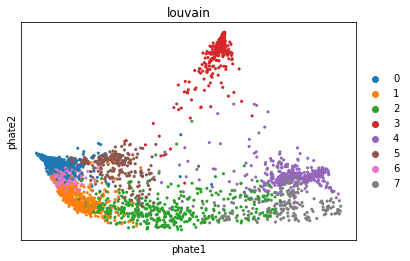

In [9]:
sce.pl.phate(cardiac_cells, color = 'louvain', vmin=0,vmax=1)

In [10]:
sc.tl.rank_genes_groups(cardiac_cells, groupby='louvain', key_added='rank_genes_r1.0')

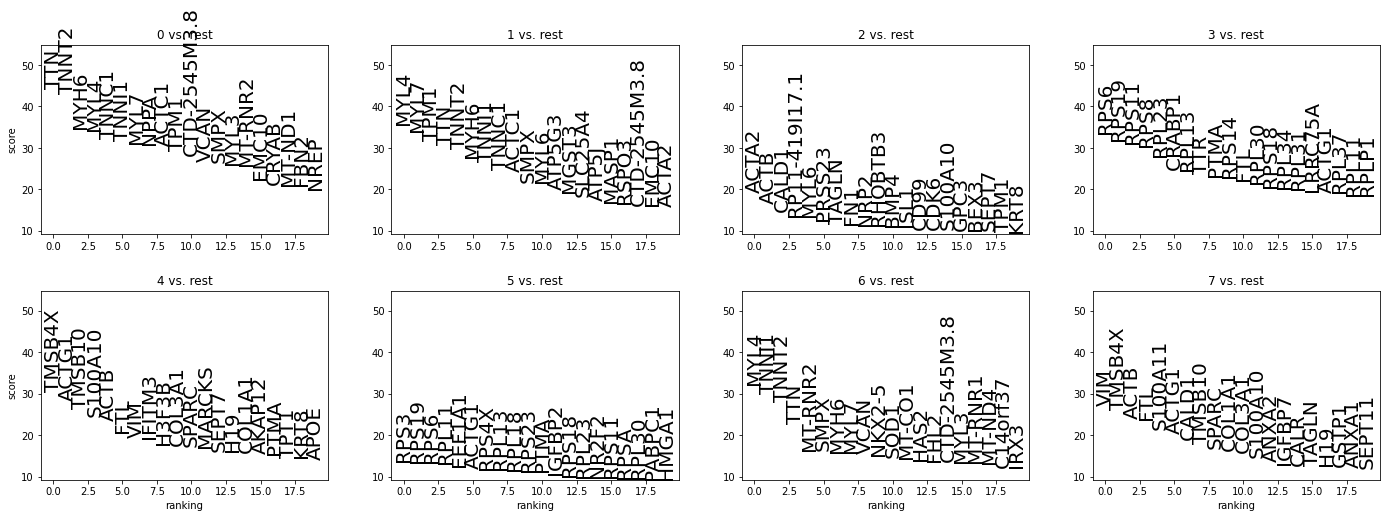

In [11]:
sc.pl.rank_genes_groups(cardiac_cells, key='rank_genes_r1.0',fontsize=20)

In [12]:
cardiac_cells.uns['iroot'] = np.flatnonzero(cardiac_cells.obs['louvain']  == '7')[0]

In [13]:
sc.tl.dpt(cardiac_cells)

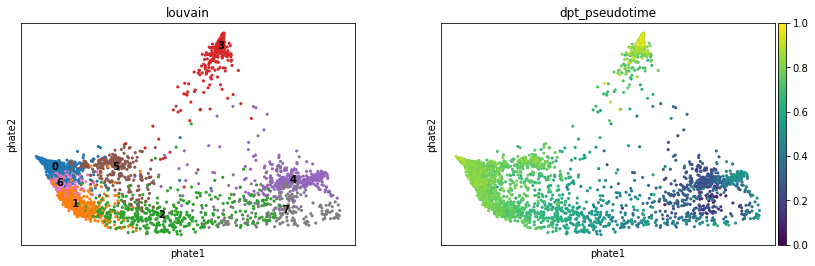

In [14]:
sce.pl.phate(cardiac_cells, color=['louvain', 'dpt_pseudotime'], legend_loc='on data')


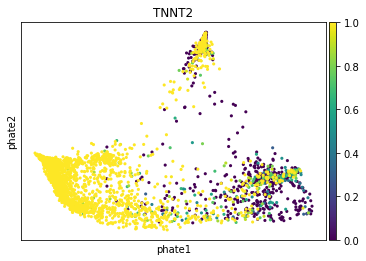

In [15]:
sce.pl.phate(cardiac_cells, color = 'TNNT2', vmin=0,vmax=1)


In [16]:
# Calculate ranks of pseudotime
array = np.array(cardiac_cells.obs['dpt_pseudotime'])

temp = array.argsort()

ranks = np.empty_like(temp)

ranks[temp] = np.arange(len(array))

cardiac_cells.obs['rank_pseudotime'] = ranks

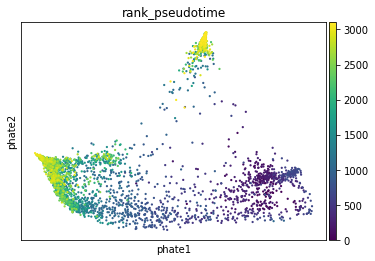

In [17]:
sce.pl.phate(cardiac_cells, color='rank_pseudotime', size=20 )

### Subset Cells and Rerun PHATE (Selected for cardiac cells)

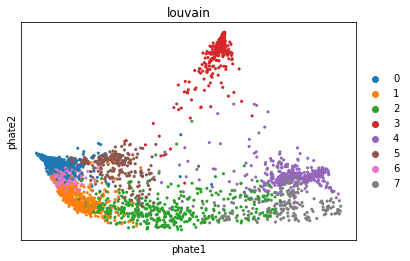

In [18]:
sce.pl.phate(cardiac_cells, color = 'louvain')

In [19]:
sg_pos = []
Interested_Cluster = ['0','1', '2', '6']
for cell in cardiac_cells.obs.index:
    if cardiac_cells[cell].obs.louvain.tolist()[0] in Interested_Cluster:
        sg_pos.append(cell)
cardiac_cells_subset = cardiac_cells[sg_pos]
cardiac_cells_subset.shape[0]

1832

In [20]:
sc.tl.pca(cardiac_cells_subset, random_state= 0)

In [98]:
sce.tl.phate(cardiac_cells_subset, k=10, a= 100, random_state = 0)

In [99]:
sc.pp.neighbors(
    cardiac_cells_subset,
    use_rep='X_pca',
    random_state = 0
)

In [100]:
sc.tl.louvain(
    cardiac_cells_subset,
    resolution = .3,
    random_state = 0)

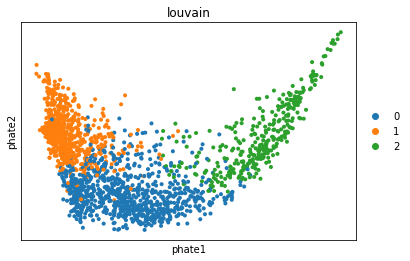

In [101]:
sce.pl.phate(cardiac_cells_subset, color = 'louvain')

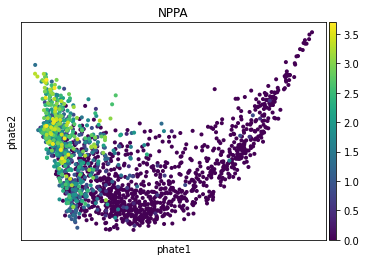

In [102]:
sce.pl.phate(cardiac_cells_subset, color = 'NPPA')

In [103]:
cardiac_cells_subset.uns['iroot'] = np.flatnonzero(cardiac_cells_subset.obs['louvain']  == '2')[0]

In [104]:
sc.tl.dpt(cardiac_cells_subset)

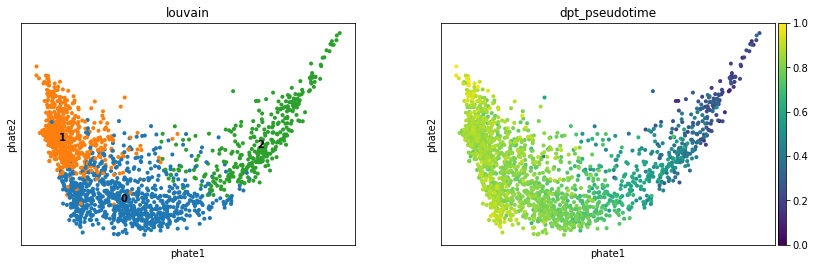

In [105]:
sce.pl.phate(cardiac_cells_subset, color=['louvain', 'dpt_pseudotime'], legend_loc='on data')

In [109]:
sc.tl.rank_genes_groups(cardiac_cells_subset, groupby='louvain', key_added='rank_genes_r1.0')

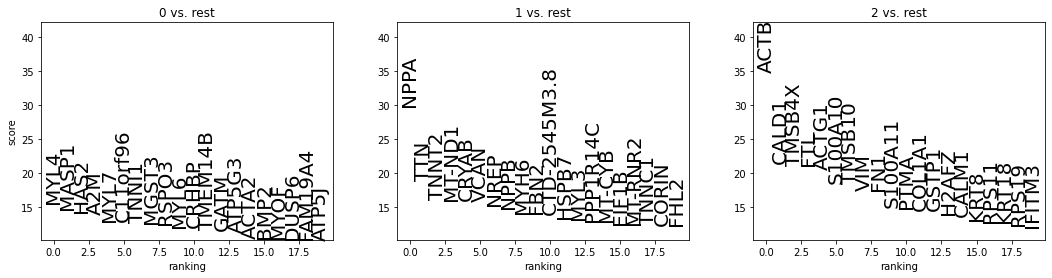

In [110]:
sc.pl.rank_genes_groups(cardiac_cells_subset, key='rank_genes_r1.0',fontsize=20)

In [111]:
# Calculate ranks of pseudotime
array = np.array(cardiac_cells_subset.obs['dpt_pseudotime'])

temp = array.argsort()

ranks = np.empty_like(temp)

ranks[temp] = np.arange(len(array))

cardiac_cells_subset.obs['rank_pseudotime'] = ranks

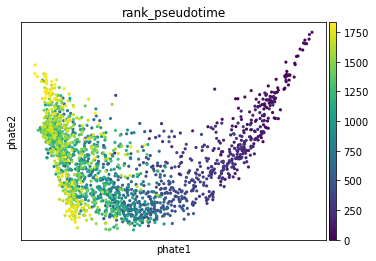

In [112]:
# Figure 4B
sce.pl.phate(cardiac_cells_subset, color='rank_pseudotime', size=40, 
#          save='_BL41Only_rank_pseudotime.pdf'
          )

In [113]:
genes_to_plot = ['TNNT2', 'MYL3', 'TTN', 'IRX2','NPPA', 'NPPB', 'TBX5']


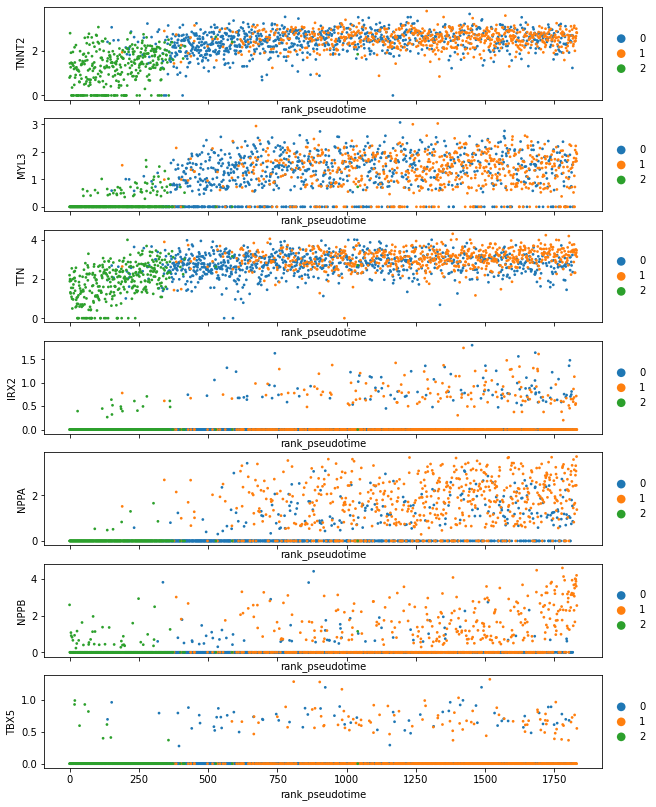

In [114]:
fig, axes = plt.subplots(nrows=len(genes_to_plot), ncols=1, figsize=(10,2*len(genes_to_plot)), sharex=True)
for i, gene in enumerate(genes_to_plot):
    sc.pl.scatter(cardiac_cells_subset, x='rank_pseudotime', y=gene, color='louvain', use_raw=True, size=30, ax=axes[i], show=False, 
                 title='')

In [115]:
cardiac_cells_subset.write('./Focused_PHATE_092121.h5ad')